## EDA por carpeta_origen

Este cuaderno realiza un análisis exploratorio (EDA) de:
- Likes (`likes_para_categoria_activity.csv`)
- Followers (`followers_para_categoria_activity.csv`)
- Followings (`followings_para_categoria_activity.csv`)

Todos los análisis se agrupan por `carpeta_origen`.


In [1]:
# Imports y configuración
import os
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 160)

# Rutas
BASE = r"C:/Users/felip/OneDrive/Escritorio/BotNetsCode/PhDBotnetsDB/Social"
LIKES_CSV = os.path.join(BASE, 'Botnets_Likes', 'likes_para_categoria_activity.csv')
FOLLOWERS_CSV = os.path.join(BASE, 'Botnets_Followers', 'followers_para_categoria_activity.csv')
FOLLOWINGS_CSV = os.path.join(BASE, 'Botnets_Followings', 'followings_para_categoria_activity.csv')

print('Rutas usadas:')
print(LIKES_CSV)
print(FOLLOWERS_CSV)
print(FOLLOWINGS_CSV)

# Utilidades

def summarize_numeric(series: pd.Series) -> dict:
    s = pd.to_numeric(series, errors='coerce')
    return {
        'count': int(s.notna().sum()),
        'mean': float(s.mean()) if s.notna().any() else np.nan,
        'std': float(s.std()) if s.notna().sum() > 1 else np.nan,
        'min': float(s.min()) if s.notna().any() else np.nan,
        'p25': float(s.quantile(0.25)) if s.notna().any() else np.nan,
        'median': float(s.median()) if s.notna().any() else np.nan,
        'p75': float(s.quantile(0.75)) if s.notna().any() else np.nan,
        'max': float(s.max()) if s.notna().any() else np.nan,
    }

def safe_len_listlike(x):
    if isinstance(x, (list, tuple, set)):
        return len(x)
    # intento convertir cuando viene como string de lista
    if isinstance(x, str) and x.startswith('[') and x.endswith(']'):
        try:
            from ast import literal_eval
            y = literal_eval(x)
            return len(y) if isinstance(y, (list, tuple, set)) else np.nan
        except Exception:
            return np.nan
    return np.nan

sns.set(style='whitegrid')


Rutas usadas:
C:/Users/felip/OneDrive/Escritorio/BotNetsCode/PhDBotnetsDB/Social\Botnets_Likes\likes_para_categoria_activity.csv
C:/Users/felip/OneDrive/Escritorio/BotNetsCode/PhDBotnetsDB/Social\Botnets_Followers\followers_para_categoria_activity.csv
C:/Users/felip/OneDrive/Escritorio/BotNetsCode/PhDBotnetsDB/Social\Botnets_Followings\followings_para_categoria_activity.csv


In [2]:
# Carga de datos
likes_df = pd.read_csv(LIKES_CSV, low_memory=False)
followers_df = pd.read_csv(FOLLOWERS_CSV, low_memory=False)
followings_df = pd.read_csv(FOLLOWINGS_CSV, low_memory=False)

print('Likes shape:', likes_df.shape)
print('Followers shape:', followers_df.shape)
print('Followings shape:', followings_df.shape)

print('\nLikes columns:', list(likes_df.columns))
print('Followers columns:', list(followers_df.columns))
print('Followings columns:', list(followings_df.columns))


Likes shape: (1693, 3)
Followers shape: (3217, 4)
Followings shape: (2555, 4)

Likes columns: ['bot_id', 'liked_tweets', 'carpeta_origen']
Followers columns: ['bot_id', 'followers_names', 'num_followers', 'carpeta_origen']
Followings columns: ['bot_id', 'followings_names', 'num_followings', 'carpeta_origen']


Filas por carpeta_origen (likes):
carpeta_origen
JournalistAttackBrianKrebs          667
Cresci2017-SocialSpambots-1         435
Cresci2015-TWT                      263
Cresci2017-TraditionalSpambots-1    125
Cresci2017-TraditionalSpambots-3    110
Cresci2017-SocialSpambots-3          70
StarWarsBotnet                       17
Cresci2015-INT                        4
Cresci2015-FSF                        2
Name: count, dtype: int64


num_liked_tweets                                                  
                                            count         mean          std    min median       max
carpeta_origen                                                                                     
Cresci2015-FSF                                  2     1.500000     0.707107    1.0    1.5       2.0
Cresci2015-INT                                  4   440.000000   216.084860  285.0  357.5     760.0
Cresci2015-TWT                                263   424.916350  2328.499366    1.0    5.0   24373.0
Cresci2017-SocialSpambots-1                   435   707.420690  5161.331933    1.0  142.0   63389.0
Cresci2017-SocialSpambots-3                    70  1001.500000  5458.556728    1.0    2.0   45087.0
Cresci2017-TraditionalSpambots-1              125   444.024000  1893.922736    1.0    6.0   18203.0
Cresci2017-TraditionalSpambots-3              110    30.818182   165.972430    1.0    5.0    1693.0
JournalistAttackBrianKrebs                    664  1312.780120  8923.988501    1.0    9.0  146672.0
StarWarsBotnet                                 17   513.764706  1457.526952    1.0   16.0    5950.0

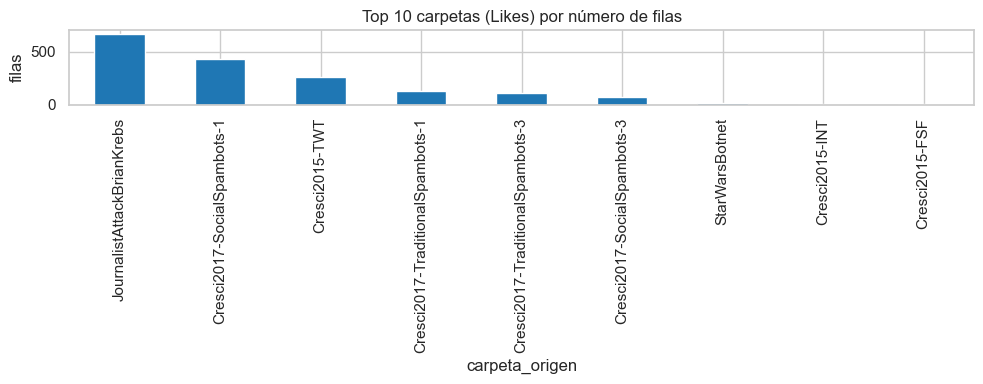

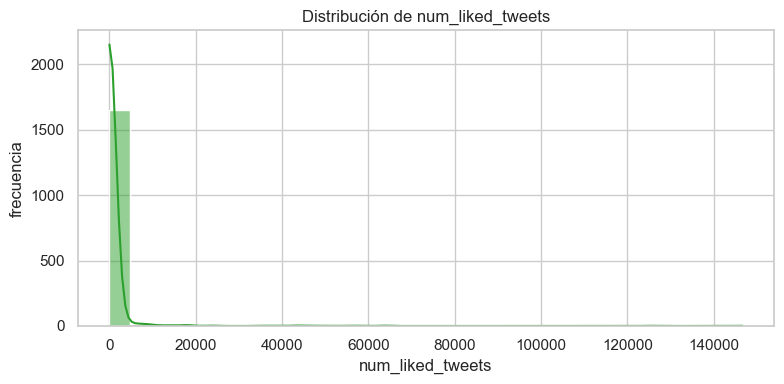

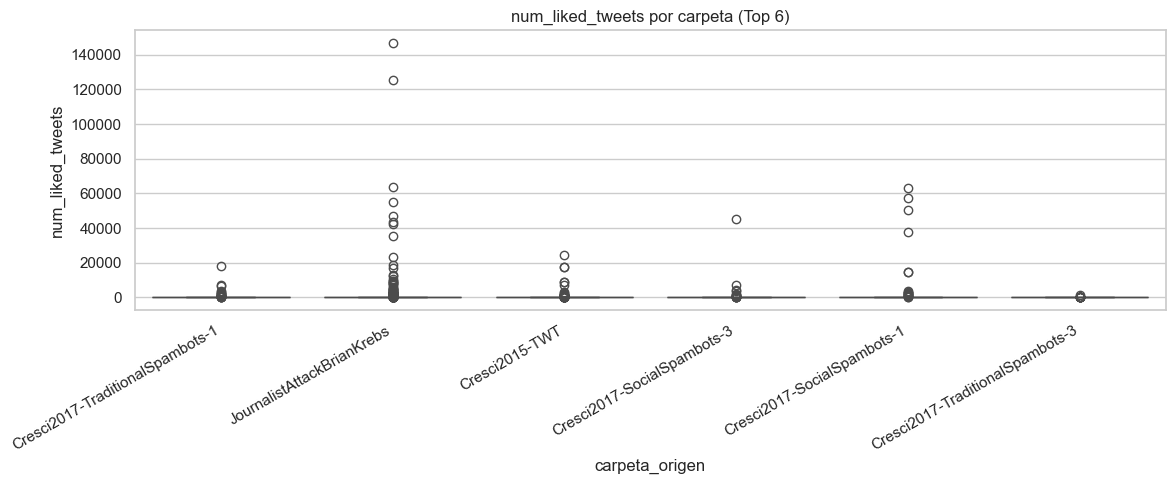

In [3]:
# EDA: Likes por carpeta_origen

# Si existe columna liked_tweets como lista/string-list, estimar longitud
likes_len_col = None
if 'liked_tweets' in likes_df.columns:
    likes_df['num_liked_tweets'] = likes_df['liked_tweets'].apply(safe_len_listlike)
    likes_len_col = 'num_liked_tweets'

# Conteos por carpeta_origen
likes_counts = likes_df['carpeta_origen'].value_counts().sort_values(ascending=False)
print('Filas por carpeta_origen (likes):')
print(likes_counts)

# Resumen numérico por carpeta
numeric_cols = [c for c in ['num_liked_tweets'] if c in likes_df.columns]
if numeric_cols:
    grouped_summary = (
        likes_df.groupby('carpeta_origen')[numeric_cols]
        .agg(['count','mean','std','min','median','max'])
        .sort_index()
    )
    display(grouped_summary)

# Top 10 carpetas por cantidad de filas
plt.figure(figsize=(10,4))
likes_counts.head(10).plot(kind='bar', color='#1f77b4')
plt.title('Top 10 carpetas (Likes) por número de filas')
plt.xlabel('carpeta_origen')
plt.ylabel('filas')
plt.tight_layout()
plt.show()

# Distribución de num_liked_tweets (si está)
if likes_len_col:
    plt.figure(figsize=(8,4))
    sns.histplot(likes_df[likes_len_col].dropna(), bins=30, kde=True, color='#2ca02c')
    plt.title('Distribución de num_liked_tweets')
    plt.xlabel('num_liked_tweets')
    plt.ylabel('frecuencia')
    plt.tight_layout()
    plt.show()

    # Boxplot por carpeta (las más grandes)
    top_carp = likes_counts.head(6).index
    plt.figure(figsize=(12,5))
    sns.boxplot(data=likes_df[likes_df['carpeta_origen'].isin(top_carp)],
                x='carpeta_origen', y=likes_len_col)
    plt.title('num_liked_tweets por carpeta (Top 6)')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


Filas por carpeta_origen (followers):
carpeta_origen
Cresci2017-TraditionalSpambots-1    655
Cresci2015-TWT                      572
JournalistAttackBrianKrebs          513
Cresci2017-SocialSpambots-1         463
Cresci2017-SocialSpambots-3         372
Cresci2017-TraditionalSpambots-4    351
Cresci2017-TraditionalSpambots-3    183
StarWarsBotnet                       53
Cresci2015-FSF                       28
Cresci2015-INT                       27
Name: count, dtype: int64


,count,mean,std,min,median,max
carpeta_origen,,,,,,
Cresci2015-FSF,28,4.321429,1.540889,1,4.5,8
Cresci2015-INT,27,8.666667,13.231664,1,3.0,50
Cresci2015-TWT,572,64.061189,338.765258,1,13.0,6368
Cresci2017-SocialSpambots-1,463,8155.166307,5123.260948,7,7446.0,58124
Cresci2017-SocialSpambots-3,372,1163.604839,5626.675959,2,592.5,102009
Cresci2017-TraditionalSpambots-1,655,580.114504,2455.783280,5,176.0,48413
Cresci2017-TraditionalSpambots-3,183,24631.174863,308850.426914,2,84.0,4167860
Cresci2017-TraditionalSpambots-4,351,364.749288,265.253625,25,293.0,2737
JournalistAttackBrianKrebs,513,386.044834,4944.303946,1,4.0,108640


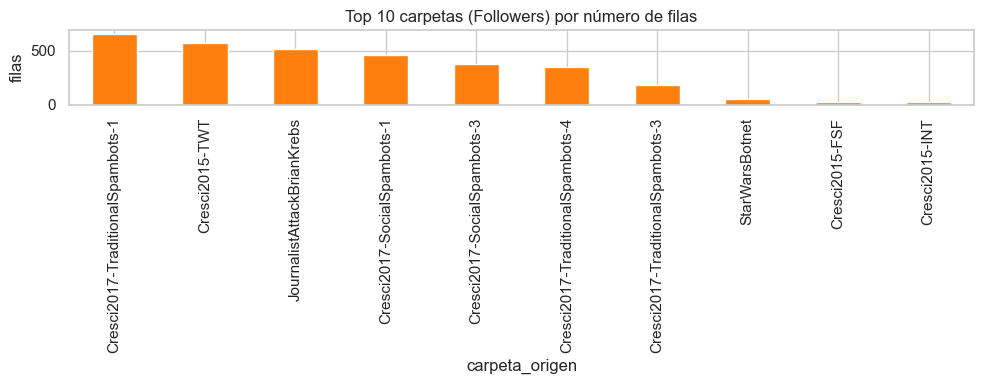

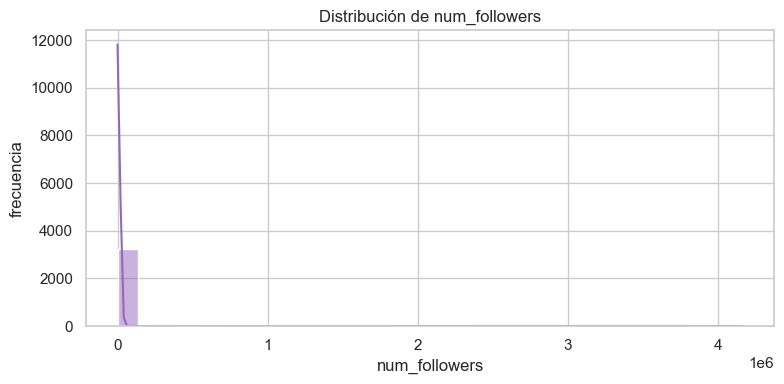


Top nombres followers - Cresci2017-TraditionalSpambots-1


Serenidade                             233
Loys ®                                 222
Jackson Ferreira                       172
Xanxan 61k                             158
Bento Dutra                            156
Louix Store                            149
JR AZEVEDO IMÓVEIS (Renato Azevedo)    109
Salomão Paixão                          99
sabrina                                 91
Piratas Download                        90
Banda Muranno                           88
Lucas                                   86
Felipe                                  82
Amanda                                  81
.                                       78
🎀                                       77
JOEL DOEKA                              76
Fernando Ferrão                         76
Luiz Eduardo                            76
Darth Pri                               74
dtype: int64


Top nombres followers - Cresci2015-TWT


Jun Tanaka                 171
Foster Family Chiro        139
Top Edge Marketing          78
NuStartCredit🌎              51
Aarron Loggins              50
GoodKnews                   30
MDKauffmannPhoto            29
Jenny Williams              28
Bulldog Media               26
Alden Halpern               25
All American Girl           25
C. Mervyn Graham ™®         22
Scott D Smith               22
Sport Fishing Weekly        20
退会ユーザー数時間後に完全削除されます。        19
Juggernaut Exploration      18
swat                        18
@official_krushialk™ ♌️     17
Paul Dawidowicz             17
Bedriftsbasen.no            17
dtype: int64


Top nombres followers - JournalistAttackBrianKrebs


.                      20
Chris                  18
パンダ社長                  15
FashionExpress         14
Alex                   11
Mark                   10
Michael                 9
James                   9
Jay                     9
D. Scott Carruthers     8
Dan                     8
観察ちゃん                   8
J                       8
...                     7
David                   7
K                       7
Jennifer                7
Mike                    7
John                    7
Mary                    6
dtype: int64


Top nombres followers - Cresci2017-SocialSpambots-1


Francesco           29
Francesca           27
Sara                26
Paolo               26
Anna                25
Antonio             25
Coltivando Oggi     24
Laura               24
Andrea              24
Chiara              24
Marco               24
NonLaSai!           24
Federica            24
FAKESTOP            24
Alessandro          23
Elisa               23
micaela barbiera    23
Martina             23
colorweb500         23
noeffeb2            23
dtype: int64


Top nombres followers - Cresci2017-SocialSpambots-3


Diana King              272
Ernest Brown            263
AdnagaMagandA           171
Gregory Powell          168
Basheerah Ahmad         116
.                       111
raggedrockmusic          70
NeedleworkCBI            65
This Is IoT              44
A Rhyme Any Old Time     43
Obi Obadike              42
Ingersoll Quotes         41
Vertex Sports            40
Michael Jai White        39
List Building Info       38
Jessica Simpson HQ       38
Manliness 101            37
Jessica                  37
Hfggerdc                 37
divina q. paluga         35
dtype: int64

In [4]:
# EDA: Followers por carpeta_origen

# Conteos por carpeta_origen
followers_counts = followers_df['carpeta_origen'].value_counts().sort_values(ascending=False)
print('Filas por carpeta_origen (followers):')
print(followers_counts)

# Resumen de num_followers por carpeta
if 'num_followers' in followers_df.columns:
    followers_summary = (
        followers_df.groupby('carpeta_origen')['num_followers']
        .agg(['count','mean','std','min','median','max'])
        .sort_index()
    )
    display(followers_summary)

# Top 10 carpetas por filas
plt.figure(figsize=(10,4))
followers_counts.head(10).plot(kind='bar', color='#ff7f0e')
plt.title('Top 10 carpetas (Followers) por número de filas')
plt.xlabel('carpeta_origen')
plt.ylabel('filas')
plt.tight_layout()
plt.show()

# Distribución de num_followers
if 'num_followers' in followers_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(followers_df['num_followers'].dropna(), bins=30, kde=True, color='#9467bd')
    plt.title('Distribución de num_followers')
    plt.xlabel('num_followers')
    plt.ylabel('frecuencia')
    plt.tight_layout()
    plt.show()

# Top seguidores (nombres) más frecuentes por carpeta (muestra)
if 'followers_names' in followers_df.columns:
    from collections import Counter
    from ast import literal_eval

    def top_names(series: pd.Series, top_n: int = 20):
        c = Counter()
        for x in series.dropna().head(20000):  # limitar por rendimiento
            try:
                lst = literal_eval(x) if isinstance(x, str) else x
                if isinstance(lst, (list, tuple)):
                    c.update([str(y) for y in lst])
            except Exception:
                continue
        return pd.Series(dict(c.most_common(top_n)))

    top_by_carpeta = {}
    for carpeta, sub in followers_df.groupby('carpeta_origen'):
        top_by_carpeta[carpeta] = top_names(sub['followers_names'])

    # Mostrar solo para las 5 carpetas con más filas
    for carpeta in followers_counts.head(5).index:
        print(f"\nTop nombres followers - {carpeta}")
        display(top_by_carpeta.get(carpeta, pd.Series()))


Filas por carpeta_origen (followings):
carpeta_origen
Cresci2017-TraditionalSpambots-1    626
Cresci2017-SocialSpambots-1         455
Cresci2017-TraditionalSpambots-4    352
Cresci2017-SocialSpambots-3         350
Cresci2015-TWT                      226
JournalistAttackBrianKrebs          191
Cresci2017-TraditionalSpambots-3    166
StarWarsBotnet                      102
Cresci2015-INT                       59
Cresci2015-FSF                       28
Name: count, dtype: int64


,count,mean,std,min,median,max
carpeta_origen,,,,,,
Cresci2015-FSF,28,161.428571,16.560615,126,161.5,200
Cresci2015-INT,59,76.457627,122.743259,1,21.0,458
Cresci2015-TWT,226,630.371681,543.829168,2,539.0,3907
Cresci2017-SocialSpambots-1,455,8094.593407,4519.161939,1,7709.0,21460
Cresci2017-SocialSpambots-3,350,1540.528571,4756.260357,21,1095.5,83977
Cresci2017-TraditionalSpambots-1,626,1174.012780,2219.205627,1,934.0,48807
Cresci2017-TraditionalSpambots-3,166,1874.668675,16457.558299,1,41.5,169573
Cresci2017-TraditionalSpambots-4,352,229.630682,66.671453,1,259.0,327
JournalistAttackBrianKrebs,191,425.146597,685.663320,1,228.0,5499


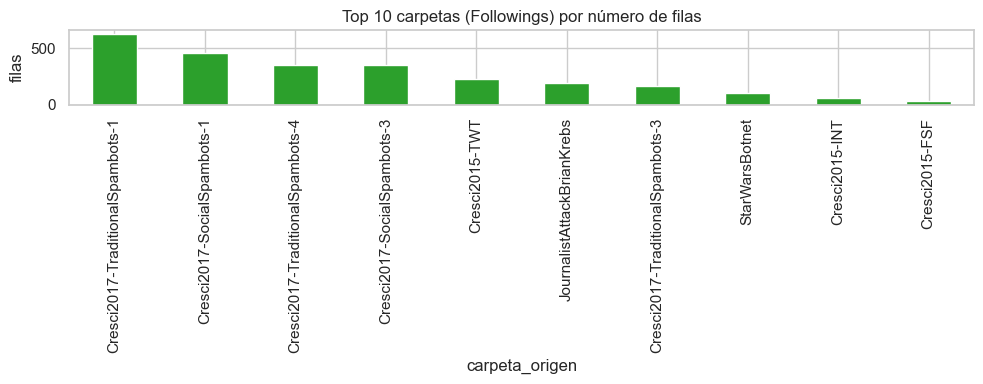

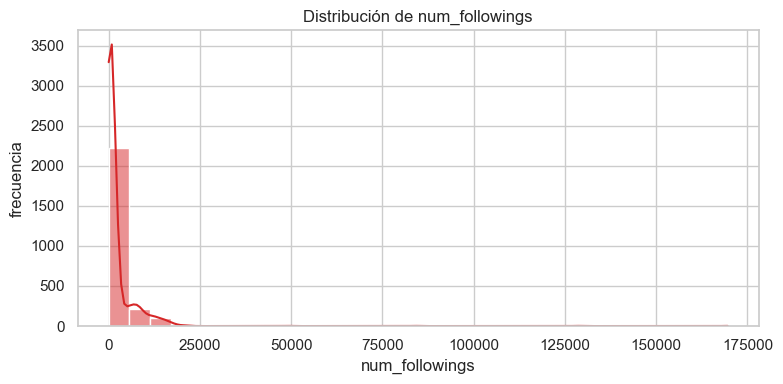


Top nombres followings - Cresci2017-TraditionalSpambots-1


.                                109
Amanda                            71
Max                               69
-                                 67
Jessica                           62
Michael                           61
Alex                              59
Mike                              58
Mysteriously Unnamed              57
Banda Muranno                     56
Daniel                            55
Bruno Maciel                      55
John                              50
Me Solta                          50
SaladaCultural                    49
Fabio Kohn                      48
Loys ®                            47
Mark                              47
Painel Brasil TV / Rosa Diniz     45
Xanxan 61k                        45
dtype: int64


Top nombres followings - Cresci2017-SocialSpambots-1


Andrea              34
Marco               32
Sara                31
Chiara              31
Francesca           29
Dio                 28
Elisa               28
Francesco           28
Maria               28
Valeria             28
Anna                28
Giulia              28
Alma                28
NonLaSai!           28
Marika              27
.                   27
Silvia              27
Alessandro          27
Davide              27
Michele Di Salvo    26
dtype: int64


Top nombres followings - Cresci2017-TraditionalSpambots-4


Tweet My Resume         352
CareerArc               345
Gary Zukowski           289
Lauriana Zukowski       276
TMJ-HAR Util Jobs       124
TMJ-CAE Util Jobs       123
TMJ-ORF Util Jobs       122
TMJ-ORL Util Jobs       120
Saudi Arabia Jobs       116
TMJ-MIA Jobs            114
TMJ-BHM Jobs            114
TMJ-VAW Jobs            114
TMJ-ICH Jobs            114
TMJ-NCT Jobs            114
TMJ-UKH Jobs            114
TMJ-BNA Jobs            114
TMJ-LON Jobs            113
TMJ-Burkina Faso Job    113
TMJ-VIR Jobs            113
TMJ-INB Jobs            113
dtype: int64


Top nombres followings - Cresci2017-SocialSpambots-3


.           138
Alex         59
Chris        56
Sarah        51
Michelle     46
Sam          45
Jessica      44
Mike         42
Amanda       42
...          42
Ashley       41
Nicole       41
Rachel       41
M            40
A            40
Lauren       39
David        39
John         39
J            38
Laura        38
dtype: int64


Top nombres followings - Cresci2015-TWT


Paul McKenna                                   115
Dr Elio Keller                                 112
Hollyscoop                                     112
Antonio Sabato Jr.                             111
Obi Obadike                                    111
David Copperfield                              111
Andra Day                                      111
RAViN                                          111
Garett Nelson                                  111
Marco Rossi                                    110
Nancy Lieberman                                110
Suzanne Marcus Fletcher                        109
LATINO                                         109
Frank D'Angelo Proudly COVID-19 Vaccinated!    108
Idil Ikhwan Rosdi                              108
BRUNO IERULLO                                  108
Jordan White                                   106
Julian Perretta                                104
Hamilton MANN                                  104
Carol Anthony                  

In [5]:
# EDA: Followings por carpeta_origen

# Conteos por carpeta_origen
followings_counts = followings_df['carpeta_origen'].value_counts().sort_values(ascending=False)
print('Filas por carpeta_origen (followings):')
print(followings_counts)

# Resumen de num_followings por carpeta
if 'num_followings' in followings_df.columns:
    followings_summary = (
        followings_df.groupby('carpeta_origen')['num_followings']
        .agg(['count','mean','std','min','median','max'])
        .sort_index()
    )
    display(followings_summary)

# Top 10 carpetas por filas
plt.figure(figsize=(10,4))
followings_counts.head(10).plot(kind='bar', color='#2ca02c')
plt.title('Top 10 carpetas (Followings) por número de filas')
plt.xlabel('carpeta_origen')
plt.ylabel('filas')
plt.tight_layout()
plt.show()

# Distribución de num_followings
if 'num_followings' in followings_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(followings_df['num_followings'].dropna(), bins=30, kde=True, color='#d62728')
    plt.title('Distribución de num_followings')
    plt.xlabel('num_followings')
    plt.ylabel('frecuencia')
    plt.tight_layout()
    plt.show()

# Top followings (nombres) más frecuentes por carpeta (muestra)
if 'followings_names' in followings_df.columns:
    from collections import Counter
    from ast import literal_eval

    def top_names(series: pd.Series, top_n: int = 20):
        c = Counter()
        for x in series.dropna().head(20000):  # limitar por rendimiento
            try:
                lst = literal_eval(x) if isinstance(x, str) else x
                if isinstance(lst, (list, tuple)):
                    c.update([str(y) for y in lst])
            except Exception:
                continue
        return pd.Series(dict(c.most_common(top_n)))

    top_by_carpeta = {}
    for carpeta, sub in followings_df.groupby('carpeta_origen'):
        top_by_carpeta[carpeta] = top_names(sub['followings_names'])

    # Mostrar solo para las 5 carpetas con más filas
    for carpeta in followings_counts.head(5).index:
        print(f"\nTop nombres followings - {carpeta}")
        display(top_by_carpeta.get(carpeta, pd.Series()))


,likes_rows,followers_rows,followings_rows,avg_num_followers,avg_num_followings,avg_num_liked_tweets
carpeta_origen,,,,,,
JournalistAttackBrianKrebs,667,513,191,386.044834,425.146597,1312.780120
Cresci2017-SocialSpambots-1,435,463,455,8155.166307,8094.593407,707.420690
Cresci2015-TWT,263,572,226,64.061189,630.371681,424.916350
Cresci2017-TraditionalSpambots-1,125,655,626,580.114504,1174.012780,444.024000
Cresci2017-TraditionalSpambots-3,110,183,166,24631.174863,1874.668675,30.818182
Cresci2017-SocialSpambots-3,70,372,350,1163.604839,1540.528571,1001.500000
StarWarsBotnet,17,53,102,103.000000,54.843137,513.764706
Cresci2015-INT,4,27,59,8.666667,76.457627,440.000000
Cresci2015-FSF,2,28,28,4.321429,161.428571,1.500000


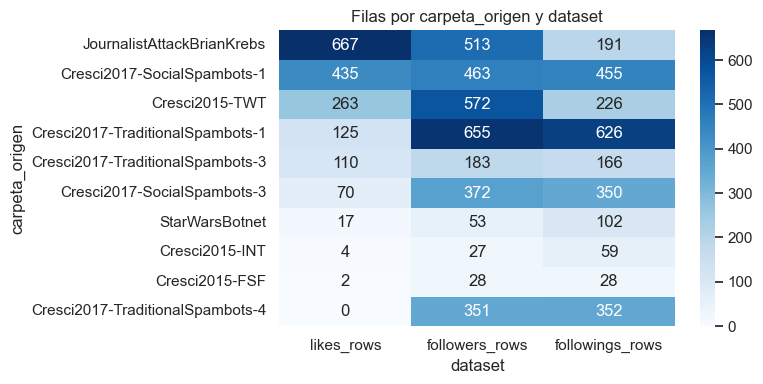

In [6]:
# Resumen combinado por carpeta_origen

# Métricas simples por dataset
likes_per_carpeta = likes_df.groupby('carpeta_origen').size().rename('likes_rows')
followers_per_carpeta = followers_df.groupby('carpeta_origen').size().rename('followers_rows')
followings_per_carpeta = followings_df.groupby('carpeta_origen').size().rename('followings_rows')

combined = (
    pd.concat([likes_per_carpeta, followers_per_carpeta, followings_per_carpeta], axis=1)
    .fillna(0)
    .astype(int)
    .sort_values(['likes_rows','followers_rows','followings_rows'], ascending=False)
)

# Si existen columnas numéricas clave, agregar medias
if 'num_followers' in followers_df.columns:
    combined = combined.join(
        followers_df.groupby('carpeta_origen')['num_followers'].mean().rename('avg_num_followers')
    )
if 'num_followings' in followings_df.columns:
    combined = combined.join(
        followings_df.groupby('carpeta_origen')['num_followings'].mean().rename('avg_num_followings')
    )
if 'num_liked_tweets' in likes_df.columns:
    combined = combined.join(
        likes_df.groupby('carpeta_origen')['num_liked_tweets'].mean().rename('avg_num_liked_tweets')
    )

display(combined)

# Heatmap de filas por dataset
plt.figure(figsize=(8, max(4, len(combined) * 0.35)))
sns.heatmap(combined[['likes_rows','followers_rows','followings_rows']], annot=True, fmt='d', cmap='Blues')
plt.title('Filas por carpeta_origen y dataset')
plt.xlabel('dataset')
plt.ylabel('carpeta_origen')
plt.tight_layout()
plt.show()


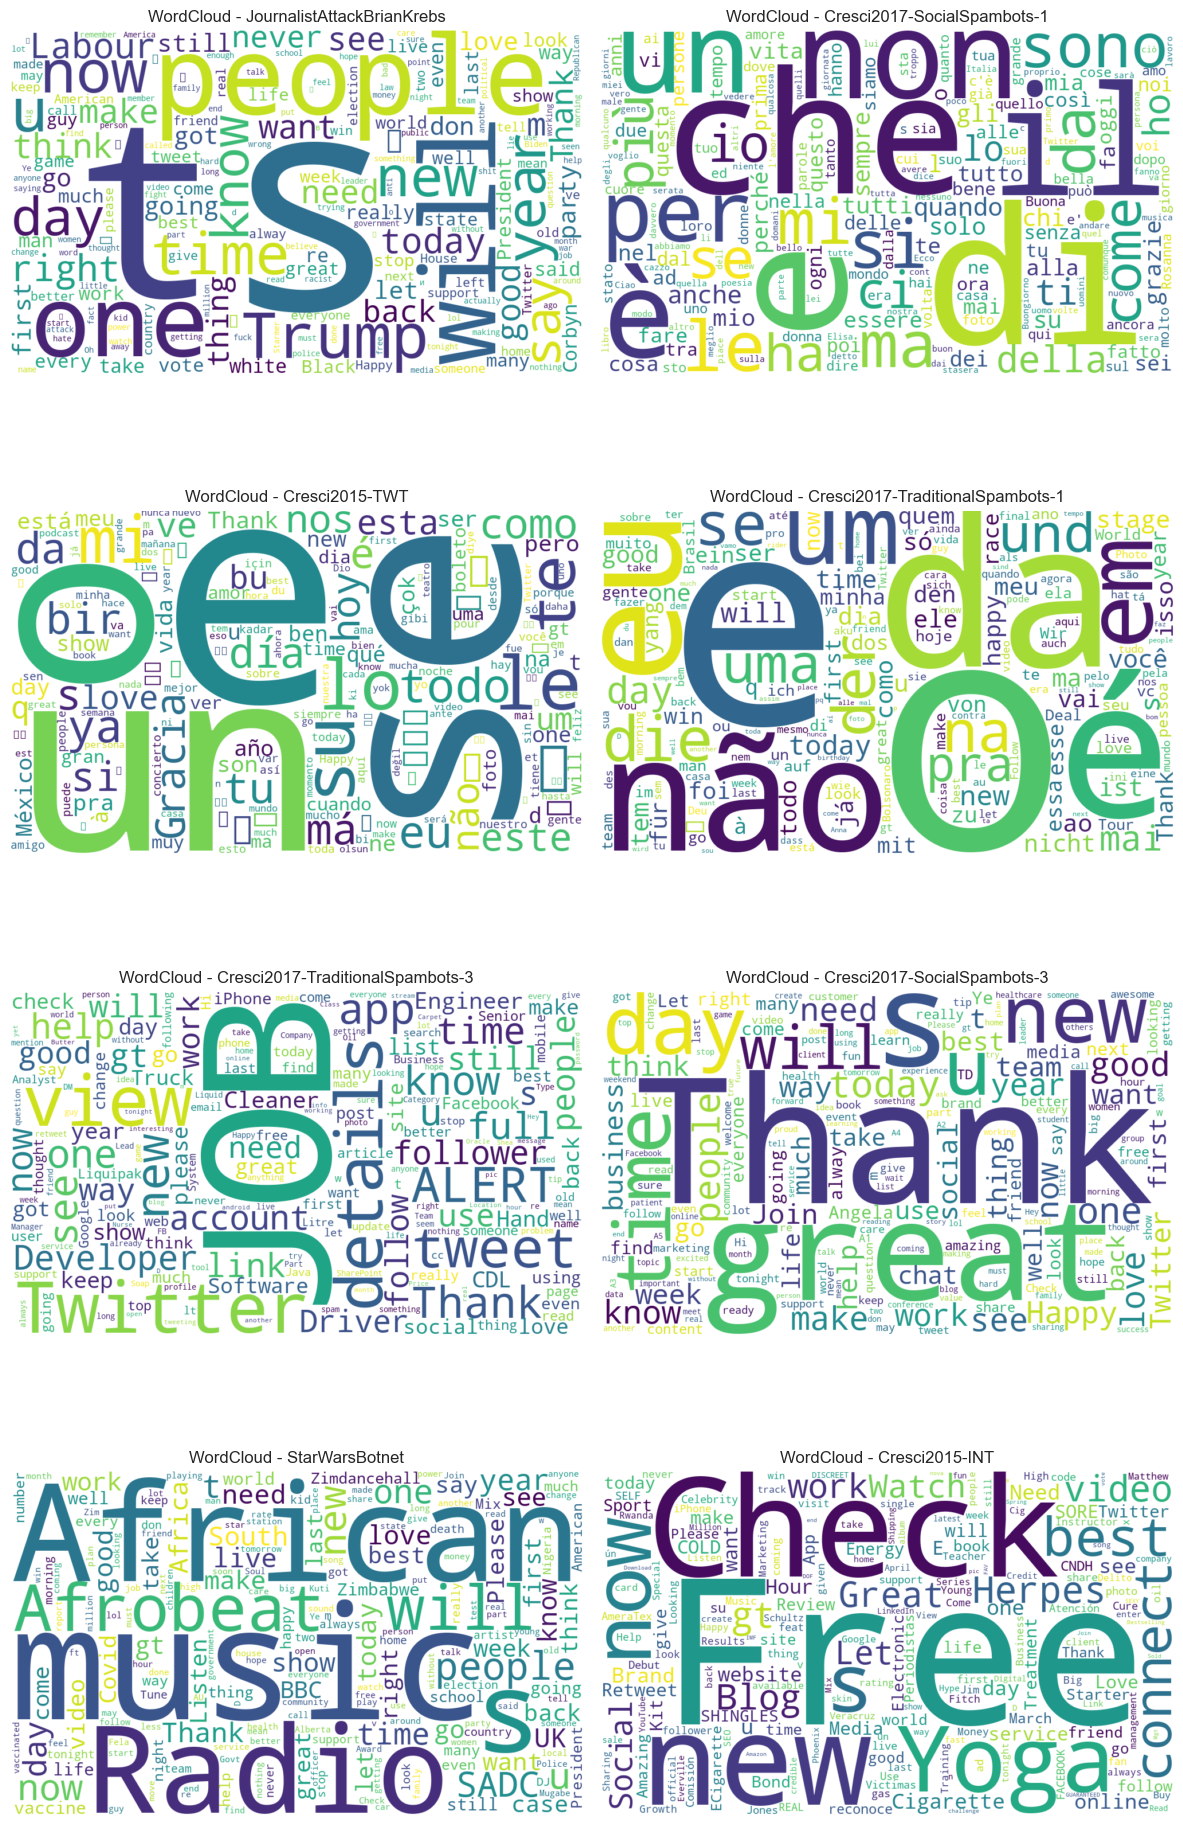


Top palabras - JournalistAttackBrianKrebs
     token   freq
0   people  51222
1     will  46840
2      one  40488
3    trump  37729
4      now  36945
5     time  29284
6     know  25907
7   labour  23661
8      new  23041
9    today  23023
10   right  22955
11    good  21892
12     day  21758
13   think  20833
14     see  20339

Top palabras - Cresci2017-SocialSpambots-1
     token   freq
0      che  86140
1      non  61042
2      per  49091
3     sono  23244
4     come  17398
5    della  15147
6   quando  12185
7    anche  11948
8     solo  10755
9      gli  10553
10  sempre  10362
11     chi  10169
12   tutti   9636
13  grazie   9563
14     mio   9367

Top palabras - Cresci2015-TWT
      token  freq
0       bir  2678
1       más  2455
2      como  2195
3   gracias  2151
4       hoy  1954
5       día  1854
6      este  1833
7       nos  1819
8       les  1671
9      todo  1643
10     love  1633
11     esta  1566
12     pero  1451
13      ser  1444
14      son  1419

Top palabras - Cr

In [7]:
# Word clouds de liked_tweets por carpeta_origen

# Requisitos: paquete wordcloud
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud, STOPWORDS
from ast import literal_eval
from collections import Counter
import re

# Preparar columna de textos
if 'liked_tweets' in likes_df.columns:
    def flatten_texts(series: pd.Series, sample_max: int = 50000):
        texts = []
        for x in series.dropna().head(sample_max):
            try:
                lst = literal_eval(x) if isinstance(x, str) else x
                if isinstance(lst, (list, tuple)):
                    texts.extend([str(t) for t in lst])
            except Exception:
                continue
        return texts

    # Stopwords en español/inglés ampliadas
    extra_sw = {
        'https', 'http', 'co', 'rt', 'amp', 'via', 'tco', 'u2019', 'u2014',
        'de', 'la', 'el', 'y', 'a', 'en', 'que', 'los', 'del', 'para', 'las', 'por', 'con', 'una', 'al',
        'the', 'to', 'of', 'and', 'in', 'is', 'for', 'on', 'this', 'that', 'it', 'at', 'as', 'are'
    }
    stopwords = STOPWORDS.union(extra_sw)

    # Generar wordcloud por carpeta (limitar a 8 más grandes para legibilidad)
    top_carp = likes_df['carpeta_origen'].value_counts().head(8).index

    n = len(top_carp)
    cols = 2
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(12, rows * 5))

    insights = {}

    for i, carpeta in enumerate(top_carp, 1):
        sub = likes_df.loc[likes_df['carpeta_origen'] == carpeta, 'liked_tweets']
        texts = flatten_texts(sub)
        joined = ' '.join(texts)
        # limpieza básica
        joined = re.sub(r'https?://\S+|www\.\S+', ' ', joined)
        joined = re.sub(r'@[A-Za-z0-9_]+', ' ', joined)
        joined = re.sub(r'#[A-Za-z0-9_]+', ' ', joined)

        wc = WordCloud(width=1000, height=600, background_color='white',
                       stopwords=stopwords, collocations=False).generate(joined)

        plt.subplot(rows, cols, i)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'WordCloud - {carpeta}')

        # top tokens para texto
        tokens = [t.lower() for t in re.findall(r"[a-zA-ZáéíóúñüÁÉÍÓÚÑÜ']+", joined)]
        tokens = [t for t in tokens if t not in stopwords and len(t) > 2]
        top_tok = Counter(tokens).most_common(15)
        insights[carpeta] = top_tok

    plt.tight_layout()
    plt.show()

    # Mostrar top tokens por carpeta (para copiar/pegar en reporte)
    for carpeta, toks in insights.items():
        print(f"\nTop palabras - {carpeta}")
        print(pd.DataFrame(toks, columns=['token','freq']))
else:
    print('No se encontró la columna liked_tweets en likes_df.')
